# ASSIGNMENT #1: Performance Benchmarking of Cryptographic Mechanisms

In this assignment we are going to measure the time taken by AES, RSA, and SHA cryptographic operations on files of different sizes using Python implementations. 

### A. Generating the text files

First of all, we are going to generate random text files with the following sizes:

• For AES (in bytes): 8, 64, 512, 4096, 32768, 262144, 2097152

• For SHA (in bytes): 8, 64, 512, 4096, 32768, 262144, 2097152

• For RSA (in bytes): 2, 4, 8, 16, 32, 64, 128

In [68]:
# Import the necessary libraries
import os
import random
import string
import timeit


# Lists containing the names of the files that will be generated
files_AES = ["type_AES__size_8.txt","type_AES__size_64.txt","type_AES__size_512.txt","type_AES__size_4096.txt","type_AES__size_32768.txt","type_AES__size_262144.txt","type_AES__size_2097152.txt"]
files_SHA = ["type_SHA__size_8.txt","type_SHA__size_64.txt","type_SHA__size_512.txt","type_SHA__size_4096.txt","type_SHA__size_32768.txt","type_SHA__size_262144.txt","type_SHA__size_2097152.txt"]
files_RSA = ["type_RSA__size_2.txt","type_RSA__size_4.txt","type_RSA__size_8.txt","type_RSA__size_16.txt","type_RSA__size_32.txt","type_RSA__size_64.txt","type_RSA__size_128.txt"]


# Gera uma string aleatória de comprimento length 
# Random.choice seleciona caracteres aleatórios 
def generate_text(length):
    return ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(length))


# Gera um arquivo de texto no caminho especificado com o tamanho em bytes fornecido (argumentos da função)
# Chama a função generate_text para gerar o texto a ser escrito no arquivo e depois escreve esse texto no arquivo
def generate_file(file_path, file_size_bytes):
    """Generate a text file with given file size."""
    with open(file_path, 'w') as file:
        text_to_right = generate_text(file_size_bytes)
        file.write(text_to_right)


# Com base no argumento passado á função, escolhe o método de criptografia a ser usado ('AES', 'SHA' ou 'RSA')
# Para cada tamanho de aequivo associado ao tipo de criptografia escolhido, gera um arquivo de texto
def gerar(file_type):
    ''' Choose what encryption method to generate files '''
    aes = [8, 64, 512, 4096, 32768, 262144, 2097152]
    sha = [8, 64, 512, 4096, 32768, 262144, 2097152]
    rsa = [2, 4, 8, 16, 32, 64, 128]

    if file_type == "AES": sizes = aes 
    elif file_type == "SHA": sizes = sha
    elif file_type == "RSA": sizes = rsa
    else: 
        print("No file generated, wrong type input")
        return
    
    for size in sizes:
        file_path = f'type_{file_type}__size_{size}.txt'
        generate_file(file_path, size)
        print(f"Generated text file '{file_path}' with size {os.path.getsize(file_path)} bytes.")

### B. Encrypt and decrypt all these files using AES (and measure the time)

This code snippet demonstrates the encryption and decryption of files using the AES algorithm with a 256-bit key. The process involves generating random text files of various sizes for AES operations, then iterating over each file to perform encryption and decryption. It employs the Python module timeit to measure the time taken for these operations, ensuring statistically significant results.

The encryption process begins by reading the file data and padding it using PKCS7. Then, it sets up the AES cipher with CBC mode and encrypts the padded data. Similarly, the decryption process decrypts the encrypted data using the AES cipher and removes padding afterward.

In [69]:
# Geração de arquivos de texto para operações AES
gerar("AES")
       
from cryptography.hazmat.primitives.asymmetric import rsa
private_key = rsa.generate_private_key(
    public_exponent=65537,
    key_size=2048,
)


Generated text file 'type_AES__size_8.txt' with size 8 bytes.
Generated text file 'type_AES__size_64.txt' with size 64 bytes.
Generated text file 'type_AES__size_512.txt' with size 512 bytes.
Generated text file 'type_AES__size_4096.txt' with size 4096 bytes.
Generated text file 'type_AES__size_32768.txt' with size 32768 bytes.
Generated text file 'type_AES__size_262144.txt' with size 262144 bytes.
Generated text file 'type_AES__size_2097152.txt' with size 2097152 bytes.


In [70]:
# Import the necessary libraries
import os
import timeit
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import padding
from binascii import hexlify


# List of files to be encrypted and decrypted
files_AES = ["type_AES__size_8.txt","type_AES__size_64.txt","type_AES__size_512.txt","type_AES__size_4096.txt","type_AES__size_32768.txt","type_AES__size_262144.txt","type_AES__size_2097152.txt"]


# Gera uma chave aleatória de 256 bits (32 bytes)
# E um vetor de inicialização (IV) de 16 bytes
# O print mostra a chave e o IV em formato hexadecimal
key = os.urandom(32)  
iv = os.urandom(16)
print(f"key: {hexlify(key)}")
print(f"iv: {hexlify(iv)}\n")


# Loop que itera sobre os arquivos da lista 'files_AES'
# Para cada arquivo, ele é aberto em modo de leitura binária
for f_id in files_AES:
    with open(f_id, 'rb') as file:

        print(f"Starting! {f_id}")

        #setup data, 
        data = file.read()
        #print(f"data: {data}")
        padder = padding.PKCS7(algorithms.AES.block_size).padder()
        padded_data = padder.update(data) + padder.finalize()

        ##encryption setup
        cipher = Cipher(algorithms.AES(key), modes.CBC(iv),backend=default_backend())

        ##encrypting
        encryptor = cipher.encryptor()

        start_timer = timeit.default_timer() #timer
        encrypted_data = encryptor.update(padded_data) + encryptor.finalize()
        print(f"Time to encrypt: {(timeit.default_timer() - start_timer):.9f}")
        #print(f"encrypted data (hex): {hexlify(encrypted_data)}")

        ##decrypting
        decryptor = cipher.decryptor()

        start_timer = timeit.default_timer() #timer
        decrypted_padded_data = decryptor.update(encrypted_data) + decryptor.finalize()
        print(f"Time to decrypt: {(timeit.default_timer() - start_timer):.9f}")
        #print(f"decrypted padded data (hex): {hexlify(decrypted_padded_data)}")


        ##remove padding apos decrypt, para analisar se esta correto
        ##nao faz parte da entrega
        unpadder = padding.PKCS7(algorithms.AES.block_size).unpadder()
        decrypted_data = unpadder.update(decrypted_padded_data) + unpadder.finalize()
        #print(f"decrypted data: {decrypted_data}")



        print(f"Done! {f_id}\n")


key: b'51a8c6a73c2bb93a141d44dcaf8f25ebbd5946de6e839df661b594c5f46b40f3'
iv: b'c224e2d5a981366053651c2cb7b35784'

Starting! type_AES__size_8.txt
Time to encrypt: 0.000093347
Time to decrypt: 0.000054705
Done! type_AES__size_8.txt

Starting! type_AES__size_64.txt
Time to encrypt: 0.000064255
Time to decrypt: 0.000053713
Done! type_AES__size_64.txt

Starting! type_AES__size_512.txt
Time to encrypt: 0.000054825
Time to decrypt: 0.000228882
Done! type_AES__size_512.txt

Starting! type_AES__size_4096.txt
Time to encrypt: 0.000055246
Time to decrypt: 0.000032870
Done! type_AES__size_4096.txt

Starting! type_AES__size_32768.txt
Time to encrypt: 0.000083235
Time to decrypt: 0.000033170
Done! type_AES__size_32768.txt

Starting! type_AES__size_262144.txt
Time to encrypt: 0.000467905
Time to decrypt: 0.000126066
Done! type_AES__size_262144.txt

Starting! type_AES__size_2097152.txt
Time to encrypt: 0.004682178
Time to decrypt: 0.002735063
Done! type_AES__size_2097152.txt



### C. Encrypt and decrypt all these files using RSA (and measure the time)

This code snippet utilizes the Python module for RSA encryption and decryption to measure the time taken for RSA encryption and decryption operations for various file sizes. It first generates a key pair with a key size of 2048 bits. Then, it defines functions for encryption and decryption using the RSA algorithm. Following this, it generates a test message to be encrypted and measures the time taken for encryption and decryption operations. Finally, it prints out the encryption and decryption times in seconds. This process allows for the assessment of the performance of RSA encryption and decryption for different file sizes.

In [71]:
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives.asymmetric import padding
import time

def generate_keypair():
    private_key = rsa.generate_private_key(
        public_exponent=65537,
        key_size=2048,
        backend=default_backend()
    )
    public_key = private_key.public_key()
    return private_key, public_key

def encrypt(message, public_key):
    ciphertext = public_key.encrypt(
        message,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return ciphertext

def decrypt(ciphertext, private_key):
    plaintext = private_key.decrypt(
        ciphertext,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return plaintext

# Generate key pair
private_key, public_key = generate_keypair()

# Message to encrypt
message = b"Hello, this is a test message to be encrypted!"

# Measure encryption time
start_time = time.time()
encrypted_message = encrypt(message, public_key)
encryption_time = time.time() - start_time

# Measure decryption time
start_time = time.time()
decrypted_message = decrypt(encrypted_message, private_key)
decryption_time = time.time() - start_time

# Print results
print(f"\nEncryption Time:", encryption_time, "seconds")
print(f"\nDecryption Time:", decryption_time, "seconds")



Encryption Time: 0.0002357959747314453 seconds

Decryption Time: 0.0012938976287841797 seconds


### D. Measure the time for SHA-256 hash generation

The code provides a way to measure the time required to generate the SHA-256 hash of files of different sizes. It employs the timeit module for accuracy in measuring execution time. The sha256 function is responsible for calculating the SHA-256 hash of a text using the cryptography library. Then, the calculate_hash_time function is used to determine the execution time of the sha256 function for each given file. When iterating over the list of files, the hash time is calculated and displayed for each file individually, allowing accurate evaluation of the performance of the SHA-256 hash algorithm at different file sizes.

In [73]:
import timeit

def sha256(plaintext):
    from cryptography.hazmat.primitives import hashes
    digest = hashes.Hash(hashes.SHA256())
    digest.update(plaintext)
    digest.finalize()

def calculate_hash_time(file_name):
    with open(file_name, 'rb') as file:
        plaintext = file.read()
        return timeit.timeit(lambda: sha256(plaintext), number=1)

files_SHA = ["type_SHA__size_8.txt", "type_SHA__size_64.txt", "type_SHA__size_512.txt", "type_SHA__size_4096.txt", "type_SHA__size_32768.txt", "type_SHA__size_262144.txt", "type_SHA__size_2097152.txt"]
#O código fornece uma maneira de medir o tempo necessário para gerar o hash SHA-256 de arquivos de diferentes tamanhos. Ele emprega o módulo timeit para precisão na medição do tempo de execução. A função sha256 é responsável por calcular o hash SHA-256 de um texto usando a biblioteca cryptography. Em seguida, a função calculate_hash_time é utilizada para determinar o tempo de execução da função sha256 para cada arquivo fornecido. Ao iterar sobre a lista de arquivos, o tempo de hash é calculado e exibido para cada arquivo individualmente, permitindo uma avaliação precisa do desempenho do algoritmo de hash SHA-256 em diferentes tamanhos de arquivo.
for file_name in files_SHA:
    hash_time = calculate_hash_time(file_name)
    print(f"'{file_name}': {hash_time:.9f} segundos")


'type_SHA__size_8.txt': 0.000254439 segundos
'type_SHA__size_64.txt': 0.000185866 segundos
'type_SHA__size_512.txt': 0.000148328 segundos
'type_SHA__size_4096.txt': 0.000134199 segundos
'type_SHA__size_32768.txt': 0.000200086 segundos
'type_SHA__size_262144.txt': 0.000572970 segundos
'type_SHA__size_2097152.txt': 0.003828687 segundos


### Plots showing

####  AES encryption/decryption times

Neste código:

Criamos duas listas, encryption_times e decryption_times, para armazenar os tempos de criptografia e descriptografia, respectivamente.
    
Iteramos sobre os arquivos da lista files_AES, calculando os tempos de criptografia e descriptografia para cada arquivo.
    
Os tempos são armazenados nas listas apropriadas e plotados em um gráfico de linha usando Matplotlib.
    
As marcas do eixo X são definidas como os nomes dos arquivos AES para facilitar a identificação.
    
Finalmente, o gráfico é exibido usando plt.show().

Starting! type_AES__size_8.txt
Done! type_AES__size_8.txt

Starting! type_AES__size_64.txt
Done! type_AES__size_64.txt

Starting! type_AES__size_512.txt
Done! type_AES__size_512.txt

Starting! type_AES__size_4096.txt
Done! type_AES__size_4096.txt

Starting! type_AES__size_32768.txt
Done! type_AES__size_32768.txt

Starting! type_AES__size_262144.txt
Done! type_AES__size_262144.txt

Starting! type_AES__size_2097152.txt
Done! type_AES__size_2097152.txt



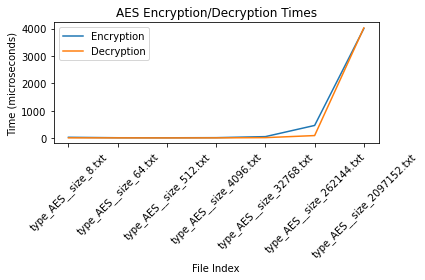

In [66]:
import os
import timeit
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import padding
from binascii import hexlify

# Lista de arquivos a serem criptografados e descriptografados
files_AES = ["type_AES__size_8.txt", "type_AES__size_64.txt", "type_AES__size_512.txt",
             "type_AES__size_4096.txt", "type_AES__size_32768.txt", "type_AES__size_262144.txt",
             "type_AES__size_2097152.txt"]

# Lista para armazenar os tempos de criptografia e descriptografia
encryption_times = []
decryption_times = []

# Gera uma chave aleatória de 256 bits (32 bytes)
# E um vetor de inicialização (IV) de 16 bytes
key = os.urandom(32)
iv = os.urandom(16)

# Loop que itera sobre os arquivos da lista 'files_AES'
# Para cada arquivo, ele é aberto em modo de leitura binária
for f_id in files_AES:
    with open(f_id, 'rb') as file:
        print(f"Starting! {f_id}")

        # Setup data
        data = file.read()
        padder = padding.PKCS7(algorithms.AES.block_size).padder()
        padded_data = padder.update(data) + padder.finalize()

        # Encryption setup
        cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=default_backend())

        # Encrypting
        encryptor = cipher.encryptor()
        start_timer = timeit.default_timer()  # Inicia o timer
        encrypted_data = encryptor.update(padded_data) + encryptor.finalize()
        encryption_time = (timeit.default_timer() - start_timer) * 1e6  # Converte para microssegundos
        encryption_times.append(encryption_time)

        # Decrypting
        decryptor = cipher.decryptor()
        start_timer = timeit.default_timer()  # Inicia o timer
        decrypted_padded_data = decryptor.update(encrypted_data) + decryptor.finalize()
        decryption_time = (timeit.default_timer() - start_timer) * 1e6  # Converte para microssegundos
        decryption_times.append(decryption_time)

        print(f"Done! {f_id}\n")

# Plotar os tempos de criptografia e descriptografia
plt.plot(encryption_times, label='Encryption')
plt.plot(decryption_times, label='Decryption')
plt.xlabel('File Index')
plt.ylabel('Time (microseconds)')
plt.title('AES Encryption/Decryption Times')
plt.legend()
plt.xticks(range(len(files_AES)), files_AES, rotation=45)
plt.tight_layout()
plt.show()


#### RSA encryption times and RSA decryption time 

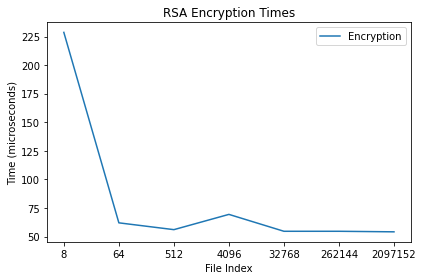

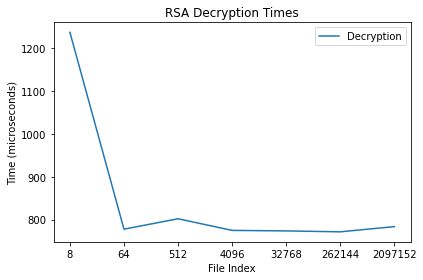

In [67]:
import time
import matplotlib.pyplot as plt
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.asymmetric import rsa
from cryptography.hazmat.primitives.asymmetric import padding

def generate_keypair():
    private_key = rsa.generate_private_key(
        public_exponent=65537,
        key_size=2048,
        backend=default_backend()
    )
    public_key = private_key.public_key()
    return private_key, public_key

def encrypt(message, public_key):
    start_time = time.time()
    ciphertext = public_key.encrypt(
        message,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    encryption_time = (time.time() - start_time) * 1e6  # Convertendo para microssegundos
    return ciphertext, encryption_time

def decrypt(ciphertext, private_key):
    start_time = time.time()
    plaintext = private_key.decrypt(
        ciphertext,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    decryption_time = (time.time() - start_time) * 1e6  # Convertendo para microssegundos
    return decryption_time

# Gerar par de chaves
private_key, public_key = generate_keypair()

# Mensagem para criptografar
message = b"Hello, this is a test message to be encrypted!"

# Lista para armazenar os tempos de criptografia e descriptografia
encryption_times = []
decryption_times = []

# Realizar criptografia e descriptografia para a mensagem
for _ in range(7):
    ciphertext, encrypted_time = encrypt(message, public_key)
    decryption_time = decrypt(ciphertext, private_key)

    # Armazenar os tempos
    encryption_times.append(encrypted_time)
    decryption_times.append(decryption_time)

# Plotar os tempos de criptografia
plt.plot(encryption_times, label='Encryption')
plt.xlabel('File Index')
plt.ylabel('Time (microseconds)')
plt.title('RSA Encryption Times')
plt.legend()
plt.xticks(range(7), ['8', '64', '512', '4096', '32768', '262144', '2097152'])
plt.tight_layout()
plt.show()

# Plotar os tempos de descriptografia
plt.plot(decryption_times, label='Decryption')
plt.xlabel('File Index')
plt.ylabel('Time (microseconds)')
plt.title('RSA Decryption Times')
plt.legend()
plt.xticks(range(7), ['8', '64', '512', '4096', '32768', '262144', '2097152'])
plt.tight_layout()
plt.show()


#### SHA digests generation times

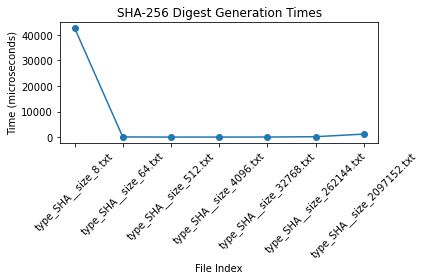

In [1]:
import matplotlib.pyplot as plt
import timeit

def sha256(plaintext):
    from cryptography.hazmat.primitives import hashes
    digest = hashes.Hash(hashes.SHA256())
    digest.update(plaintext)
    digest.finalize()

def calculate_hash_time(file_name):
    with open(file_name, 'rb') as file:
        plaintext = file.read()
        return timeit.timeit(lambda: sha256(plaintext), number=1) * 1e6  # Convertendo para microssegundos

files_SHA = ["type_SHA__size_8.txt", "type_SHA__size_64.txt", "type_SHA__size_512.txt",
             "type_SHA__size_4096.txt", "type_SHA__size_32768.txt", "type_SHA__size_262144.txt",
             "type_SHA__size_2097152.txt"]

hash_times = []
for file_name in files_SHA:
    hash_time = calculate_hash_time(file_name)
    hash_times.append(hash_time)

# Plotar os tempos de geração de hashes SHA-256
plt.plot(hash_times, marker='o')
plt.xlabel('File Index')
plt.ylabel('Time (microseconds)')
plt.title('SHA-256 Digest Generation Times')
plt.xticks(range(len(files_SHA)), files_SHA, rotation=45)
plt.tight_layout()
plt.show()



### Comparison between AES ecryption and RSA encryption